# The Bit-Flip Code: 
## Part A: |0> state as input 
## Part B: superposition state as input
Quantum error correction is crucial for quantum computers, here we discuss about the bit-flip code with two different inputs and demonstrate the simulation results.

# Part A. The bit flip code: |0> state as input
Here we define p as the probability the qubit will flip at the output, and (1-p) as the probability that the qubit can be transmitted correctly.

The bit-flip code increases the probability (1-p) by using the 3-qubit repetition code, the probability of 1-p can be increased to $(1-p)^3$+ $3p(1-p)^2$.  

In [1]:
# Import libraries for use
from qiskit import *
import numpy as np
from random import random
from qiskit.extensions import Initialize
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_textbook.tools import random_state, array_to_latex

In [2]:
## SETUP
# Protocol uses 4 qubits and 1 classical bit in a register
qr = QuantumRegister(4, name="q")    # Protocol uses 4 qubits
cr = ClassicalRegister(1, name="cr") # and 1 classical bit cr
bit_flip_circuit = QuantumCircuit(qr, cr)

In [3]:
def encoding(qc, q0, q1, q2):
    """Creates encoding process using qubits q0 & q1 & q2"""
    qc.cx(q0,q1) # CNOT with q1 as control and q0 as target (Use q1 to control q0.)
    qc.cx(q0,q2) # CNOT with q2 as control and q0 as target

By default, the initial state in Qiskit is $\left|0\right\rangle$.  
In the circuit we create $\left|q3\right\rangle$= $\sqrt{1-p}\left|0\right\rangle +\sqrt{p}\left|1\right\rangle $ to simulate the probability of the occurrence of error.  After measuring the the state, the state has a probabilty of (1-p) to collapase to $\left|0\right\rangle$ state and probability of p to collapse to $\left|1\right\rangle$ state.   
We applied the occurence of the error to the three input qubits, and the probability of the input $\left|0\right\rangle$ state transmitted correctly is the same, which is (1-p) in this case. 


In [4]:
# initialization instruction to create  
# |ψ⟩ from the state |0⟩:  
p = 0.3 # p stands for the probability of fliping the state of the qubit
psi = [np.sqrt(1-p), np.sqrt(p)]
init_gate = Initialize(psi) # initialize the superposition state
init_gate.label = "init"

In [5]:
def error_simulation(qc, q0, q1, q2, q3):
    """Creates error simulation using qubits q0 & q1 & q2 & q3"""
    qc.append(init_gate, [3]) # create the superposition state for |q3>
    measure(qc, 3, 0) # measure the state on |q3>
    qc.x(q0).c_if(cr, 1) # apply x gate on q0 if |1> was measured by |q3>
    qc.append(init_gate, [3])
    measure(qc, 3, 0)
    qc.x(q1).c_if(cr, 1) # apply x gate on q1 if |1> was measured by |q3>
    qc.append(init_gate, [3])
    measure(qc, 3, 0)
    qc.x(q2).c_if(cr, 1) # apply x gate on q2 if |1> was measured by |q3>

In [6]:
def measure(qc, q0, cr):
    """Measures qubit q0 """
    qc.barrier()
    qc.measure(q0,cr)

In [7]:
def decoding(qc, q0, q1, q2):
    """Creates decoding process using qubits q0 & q1 & q2"""
    qc.cx(q0,q1) # CNOT with q1 as control and q0 as target
    qc.cx(q0,q2) # CNOT with q2 as control and q0 as target
    qc.ccx(q2,q1,q0) # Apply a Toffoli gate |011> <-> |111>

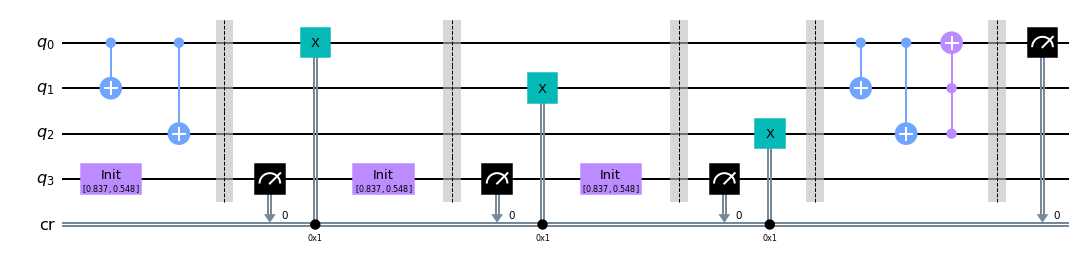

In [8]:
# Let's apply the process above to our circuit:

# step 1. encoding
encoding(bit_flip_circuit, 0, 1, 2)

# step 2. error simulation
error_simulation(bit_flip_circuit, 0, 1, 2, p)
bit_flip_circuit.barrier()

# step 3. decoding
decoding(bit_flip_circuit, 0, 1, 2)

# step 4. measurement
measure(bit_flip_circuit, 0, 0)

# View the circuit:
%matplotlib inline
bit_flip_circuit.draw(output='mpl')

# Measurement result
The result shows that the probability of $\left|0\right\rangle$ state $\left|1\right\rangle$ state measured at the output.   
The result shows that the probability of $\left|0\right\rangle$ correctly transmitted using the bit-flip code is higher than the probability of 0.7, which is the case without error correction. 

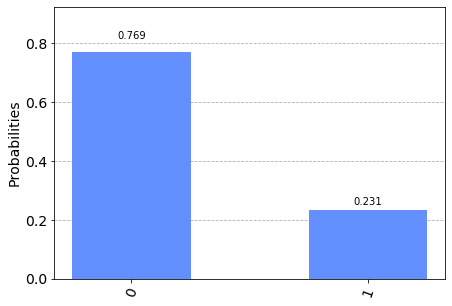

In [9]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(bit_flip_circuit, backend, shots=1024).result().get_counts() # No. of measurement shots = 1024
plot_histogram(counts)

# Decoding result analysis
The table below shows the result before and after the decoding process. 

The probability of the decoding result also depends on the probability of the error simulation.

| Before Decoding |  | After decoding |
| :- | -: | :-: |
| 000 | |000 | 
| 001 | |001 | 
| 010 | |010 | 
| 011 | |111 | 
| 100 | |011 | 
| 101 | |110 | 
| 110 | |101 | 
| 111 | |100 | 

# Part B. The bit flip code: Input  superpostion state
Here we initialize the state as a random superposition state. 

In [10]:
## SETUP
# Protocol uses 4 qubits and 1 classical bit in a register
qr = QuantumRegister(4, name="q")    # Protocol uses 4 qubits
cr = ClassicalRegister(1, name="cr") # and 1 classical bit cr
bit_flip_random_circuit = QuantumCircuit(qr, cr)

<IPython.core.display.Math object>

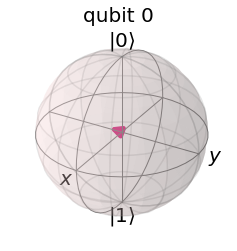

In [11]:
# Create random 1-qubit state
psi_random = random_state(1)

# Display it nicely
array_to_latex(psi_random, pretext="|\\psi\\rangle =")

# Show it on a Bloch sphere
plot_bloch_multivector(psi_random)

In [12]:
# initialization instruction to create  
# |ψ⟩ from the state |0⟩:
#(Initialize is technically not a gate since it contains a reset operation.)
init_gate_random = Initialize(psi_random)
init_gate_random.label = "init_random"

In [13]:
#Since all quantum gates are reversible, 
#we can find the inverse of these gates using:
inverse_init_gate_random = init_gate_random.gates_to_uncompute()

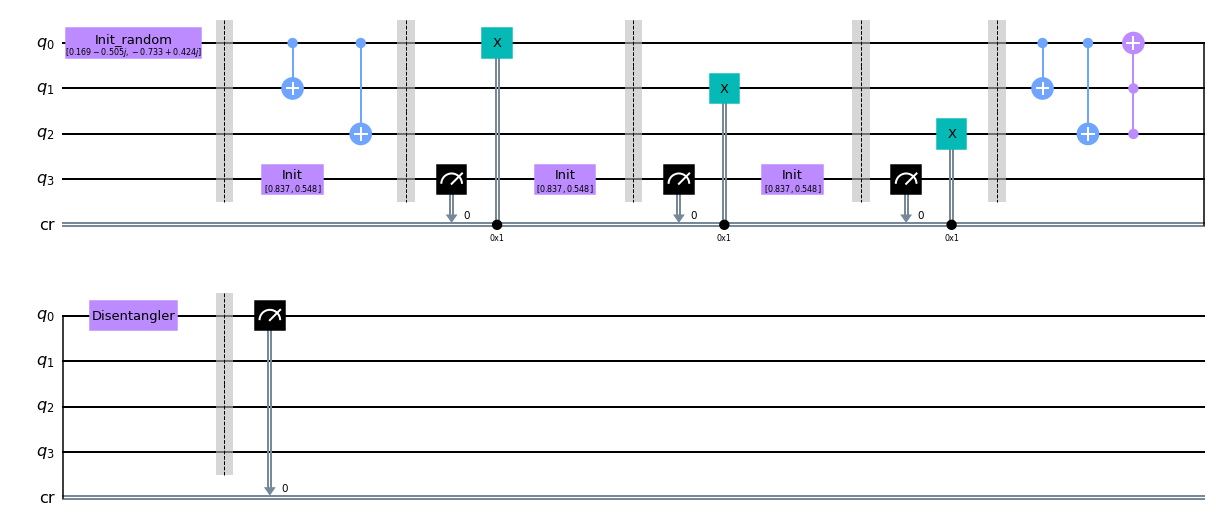

In [14]:
# Let's apply the process above to our circuit:

## STEP 0
# First, let's initialize Alice's q0
bit_flip_random_circuit.append(init_gate_random, [0])
bit_flip_random_circuit.barrier()

# step 1. encoding
encoding(bit_flip_random_circuit, 0, 1, 2)

# step 2. error simulation
error_simulation(bit_flip_random_circuit, 0, 1, 2, p)
bit_flip_random_circuit.barrier()

# step 3. decoding
decoding(bit_flip_random_circuit, 0, 1, 2)

## STEP 4
# reverse the initialization process
bit_flip_random_circuit.append(inverse_init_gate_random, [0])

# step 5. measurement
measure(bit_flip_random_circuit, 0, 0)

# View the circuit:
%matplotlib inline
bit_flip_random_circuit.draw(output='mpl')

# Measurement result

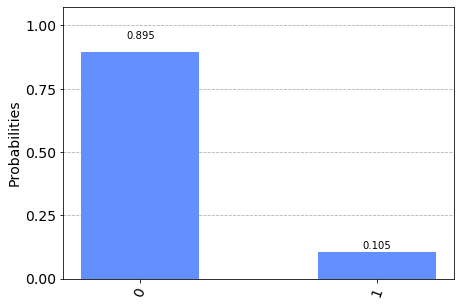

In [15]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(bit_flip_random_circuit, backend, shots=1024).result().get_counts() # No. of measurement shots = 1024
plot_histogram(counts)